In [353]:
import pandas as pd
import numpy as np
import math

In [354]:
df = pd.read_csv("movies.csv")

In [355]:
df

,title,action,comedy,romance,scifi,drama,year,rating
0,Inception,9,2,1,10,6,2010,8.8
1,The Dark Knight,10,1,2,1,8,2008,9.0
2,Pulp Fiction,7,8,3,0,9,1994,8.9
3,Forrest Gump,2,7,8,0,10,1994,8.8
4,The Matrix,10,2,1,10,5,1999,8.7
...,...,...,...,...,...,...,...,...
208,Shrek,5,10,6,0,5,2001,7.9
209,Shrek 2,4,10,5,0,5,2004,7.4
210,Frozen,3,7,7,0,6,2013,7.4
211,Moana,4,7,5,0,7,2016,7.6


In [356]:
df[df.duplicated()]

,title,action,comedy,romance,scifi,drama,year,rating


In [357]:
df.info

<bound method DataFrame.info of                title  action  comedy  romance  scifi  drama  year  rating
0          Inception       9       2        1     10      6  2010     8.8
1    The Dark Knight      10       1        2      1      8  2008     9.0
2       Pulp Fiction       7       8        3      0      9  1994     8.9
3       Forrest Gump       2       7        8      0     10  1994     8.8
4         The Matrix      10       2        1     10      5  1999     8.7
..               ...     ...     ...      ...    ...    ...   ...     ...
208            Shrek       5      10        6      0      5  2001     7.9
209          Shrek 2       4      10        5      0      5  2004     7.4
210           Frozen       3       7        7      0      6  2013     7.4
211            Moana       4       7        5      0      7  2016     7.6
212          Tangled       4       8        8      0      6  2010     7.7

[213 rows x 8 columns]>

In [358]:
df.describe()

,action,comedy,romance,scifi,drama,year,rating
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,4.671362,5.502347,3.840376,1.882629,6.877934,2005.286385,7.787324
std,3.120984,3.131737,2.948115,3.288104,1.841383,10.129243,0.567749
min,0.000000,0.000000,0.000000,0.000000,2.000000,1972.000000,6.500000
25%,2.000000,3.000000,2.000000,0.000000,6.000000,1999.000000,7.400000
50%,4.000000,5.000000,3.000000,0.000000,7.000000,2007.000000,7.800000
75%,7.000000,8.000000,5.000000,2.000000,8.000000,2013.000000,8.100000
max,10.000000,10.000000,10.000000,10.000000,10.000000,2022.000000,9.300000


_Normalize every values so i can compare them without size interferring_

In [359]:
df.dtypes

title       object
action       int64
comedy       int64
romance      int64
scifi        int64
drama        int64
year         int64
rating     float64
dtype: object

In [360]:
df.action.max()

np.int64(10)

In [361]:
def normalize_minmax(values):
    """
    Normalise un array de valeurs entre 0 et 1
    
    Paramètres:
    values: numpy array ou liste de nombres
    
    Retour:
    numpy array normalisé entre 0 et 1
    """
    return (values - 0) / (10 - 0)

df.action = df.action.apply(normalize_minmax)
df.comedy = df.comedy.apply(normalize_minmax)
df.romance = df.romance.apply(normalize_minmax)
df.scifi = df.scifi.apply(normalize_minmax)
df.drama = df.drama.apply(normalize_minmax)

In [362]:
df

,title,action,comedy,romance,scifi,drama,year,rating
0,Inception,0.9,0.2,0.1,1.0,0.6,2010,8.8
1,The Dark Knight,1.0,0.1,0.2,0.1,0.8,2008,9.0
2,Pulp Fiction,0.7,0.8,0.3,0.0,0.9,1994,8.9
3,Forrest Gump,0.2,0.7,0.8,0.0,1.0,1994,8.8
4,The Matrix,1.0,0.2,0.1,1.0,0.5,1999,8.7
...,...,...,...,...,...,...,...,...
208,Shrek,0.5,1.0,0.6,0.0,0.5,2001,7.9
209,Shrek 2,0.4,1.0,0.5,0.0,0.5,2004,7.4
210,Frozen,0.3,0.7,0.7,0.0,0.6,2013,7.4
211,Moana,0.4,0.7,0.5,0.0,0.7,2016,7.6


In [367]:
def film_vectors(row):
    return row.iloc[[1, 2, 3, 4, 5]].to_numpy()

def recommend(movie_title, df, n=5, method='cosine'):
    if method not in ['cosine', 'euclidian']:
        return "Choose between cosine, euclidian"
    recommandations = {"title": [],
                       "score": []}
    """
    Recommande les N films les plus similaires à un film donné

    Paramètres:
    movie_title: str - titre du film de référence
    df: DataFrame - dataset des films
    n: int - nombre de recommandations
    method: str - 'cosine' ou 'euclidean'

    Retour:
    DataFrame avec les N films recommandés et leur score de similarité
    """
    findfilm = df[df.title == movie_title]
    if len(findfilm) == 0 :
        return "Film inexistant"
    ed = findfilm.iloc[:, [1, 2,3,4,5]].iloc[0].to_numpy()
    if method == 'cosine':
        scores = df.apply(lambda row: cosine_similarity(ed, film_vectors(row)), axis=1)
        recommandations['title'] = df['title']
        recommandations['score'] = scores
        reco_df = pd.DataFrame(recommandations)
        reco_df = reco_df.sort_values(by='score', ascending=False)
        return reco_df.head(n)
    if method == 'euclidian':
        scores = df.apply(lambda row: euclidian_distance(ed, film_vectors(row)), axis=1)
        recommandations['title'] = df['title']
        recommandations['score'] = scores
        reco_df = pd.DataFrame(recommandations)
        reco_df = reco_df.sort_values(by='score')
        return reco_df.head(n)

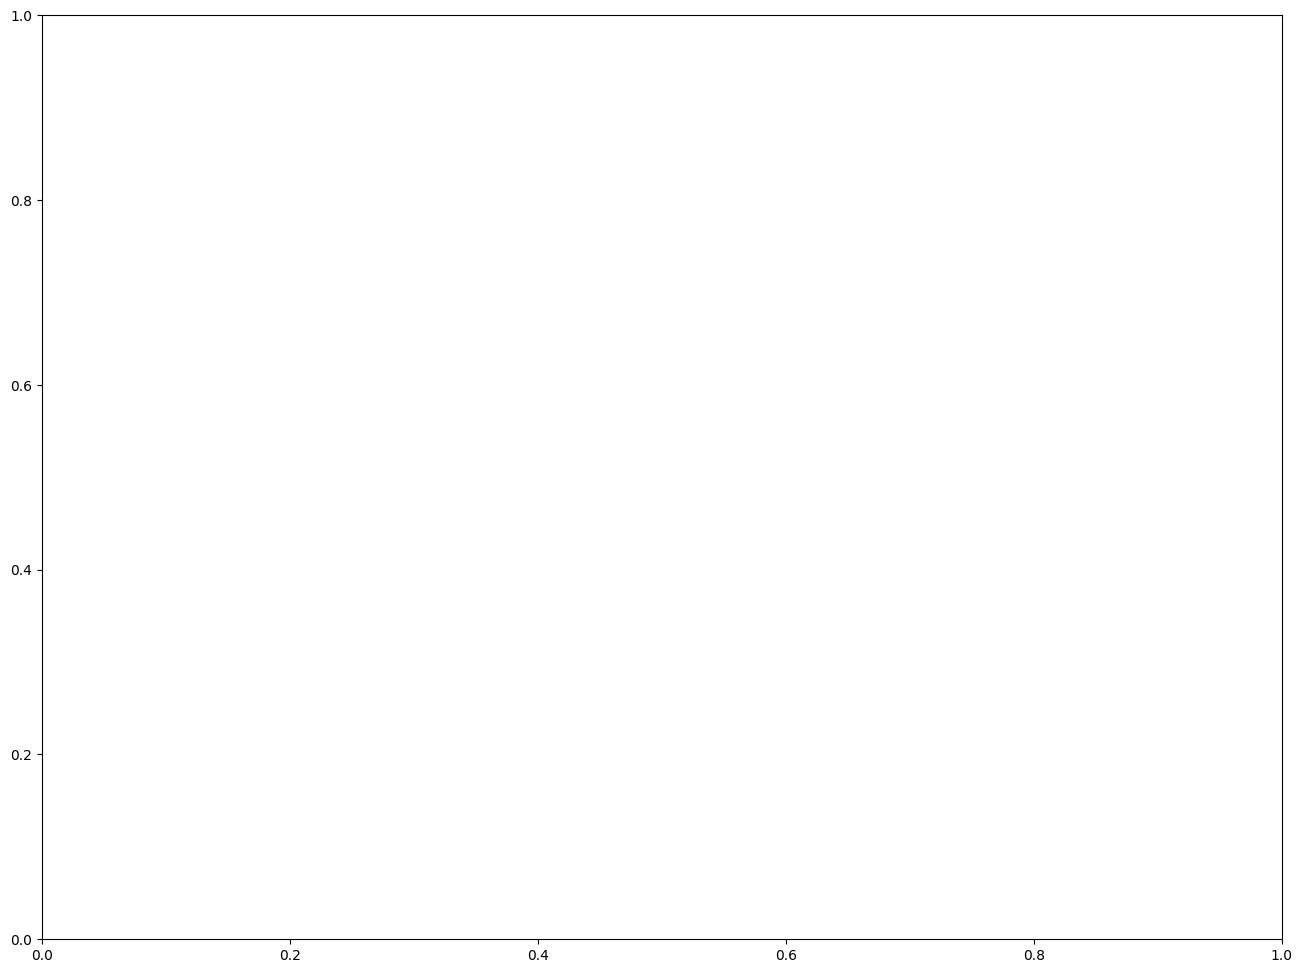

In [ ]:
import matplotlib.pyplot as plt
ga = recommend("The Matrix", df, 10, 'euclidian')
fig, (ax1) = plt.subplots(1, figsize=(16, 12))
    ax1.bar(ga[0], user_A, 0.2, label='User A', alpha=0.7)
    ax1.bar([i for i in x], user_B, 0.2, label='User B', alpha=0.7)
    ax1.bar([i+0.2 for i in x], user_C, 0.2, label='User C', alpha=0.7)

In [369]:
recommend("The Matrix", df, 10, 'cosine')

,title,score
21,Edge of Tomorrow,1.54
23,Arrival,1.54
42,WALL-E,1.53
4,The Matrix,1.52
22,Guardians of the Galaxy,1.51
73,Terminator 2: Judgment Day,1.49
70,Minority Report,1.48
191,Snowpiercer,1.48
0,Inception,1.47
11,Blade Runner 2049,1.47
